<a href="https://colab.research.google.com/github/hpark005/poker/blob/main/Pandas_Review_(Stepbros_%3E).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to a brief review of Pandas!
## Pandas is a Python library created for data analysis and manipulation. If you are familiar with Pandas this might be a helpful review. If you have less familiarity this lesson should hopefully help you with common syntax and uses.

In [ ]:
import pandas as pd

# Our first step is pretty simple, just importing pandas which is already supported by Colab and most other Jupyter style platforms

In [ ]:
housepoints = pd.DataFrame()

# There are many ways to create dataframes in Pandas. For this notebook we will create our dataframe and then add columns as we see fit
# Another common method of creating a dataframe is by reading in a .csv file:

# housepoints = pd.read_csv("housepoints.csv")

In [ ]:
houses = ["Stepbros", "Pandas", "Booty Nuggets", "Akatsuki", "Top Dawgs"]
points = [100, 10, -50, 17, 80]

housepoints["House"] = houses
housepoints["Points"] = points

# Here we see how we can create new columns in our dataframe using arrays. Lets see what our dataframe looks like now

In [ ]:
housepoints

,House,Points
0,Stepbros,100
1,Pandas,10
2,Booty Nuggets,-50
3,Akatsuki,17
4,Top Dawgs,80


In [ ]:
best_house = housepoints.loc[0]
print(best_house)

# We can use the .loc function to select row objects from dataframes based on index.
# What is another way we can set the value of best_house to be the row containing Stepbros?


best_house = housepoints.loc[housepoints["House"] == "Stepbros"]
print(best_house)

House     Stepbros
Points         100
Name: 0, dtype: object
      House  Points
0  Stepbros     100


In [ ]:
# We also have access to another dataframe "househangs" containing data about the number of hangouts each house has had

househangs = pd.DataFrame()

househangs["House"] = ["Stepbros", "Pandas", "Booty Nuggets", "Akatsuki", "Top Dawgs"]
househangs["Hangouts"] = [5, 7, 4, 10, 8]

househangs

,House,Hangouts
0,Stepbros,5
1,Pandas,7
2,Booty Nuggets,4
3,Akatsuki,10
4,Top Dawgs,8


In [ ]:
# We want to combine the two dataframes we have into one. To do this we should merge our dataframes!

houses = housepoints.merge(househangs, on="House")

In [ ]:
houses

,House,Points,Hangouts
0,Stepbros,100,5
1,Pandas,10,7
2,Booty Nuggets,-50,4
3,Akatsuki,17,10
4,Top Dawgs,80,8


In [ ]:
# We want to rename the column "Hangouts" to "House Hangs"

houses = houses.rename(columns={"Hangouts":"House Hangs"})

In [ ]:
houses

,House,Points,House Hangs
0,Stepbros,100,5
1,Pandas,10,7
2,Booty Nuggets,-50,4
3,Akatsuki,17,10
4,Top Dawgs,80,8


In [ ]:
# Now we have a dataframe with columns "House", "Points", and "Hangouts".
# We want to make a new table that is sorted by number of house hangs (descending)

sorted = houses.sort_values("House Hangs", ascending=False)

In [ ]:
sorted

# Now we have a new problem! Our indexes are no longer in a correct order!

,House,Points,House Hangs
3,Akatsuki,17,10
4,Top Dawgs,80,8
1,Pandas,10,7
0,Stepbros,100,5
2,Booty Nuggets,-50,4


In [ ]:
sorted_correct = sorted.set_index("House")

# We can fix our index issue by changing the index of our dataframe to be the "House" column
# Remember that the column we set as our index must have unique values!

In [ ]:
sorted_correct

,Points,House Hangs
House,,
Akatsuki,17,10
Top Dawgs,80,8
Pandas,10,7
Stepbros,100,5
Booty Nuggets,-50,4


In [ ]:
leaders = sorted_correct.loc[sorted_correct["House Hangs"] >= 5]

# Now we want to only select the rows for houses with at least 5 house hangs

In [ ]:
# we can also do it like this:

leaders = sorted_correct[sorted_correct["House Hangs"] >= 5]

In [ ]:
leaders

,Points,House Hangs
House,,
Akatsuki,17,10
Top Dawgs,80,8
Pandas,10,7
Stepbros,100,5


Now it's your turn to solve some problems using the tools we went over. For this part of the workshop we will be using real data from the Spring 2023 House Competition.

Some skeleton code will be provided but for the most part you can solve the problems in whatever way you see fit!

In [ ]:
s23 = pd.read_csv("/content/House Competition 2023 - Sheet1.csv")

s23

,Date,Akatsuki,Bootynuggets,Pandas,Step Bros,Subways,Top Dawgs,Unnamed: 7,Notes
0,1/20/2023,NaN,NaN,23.0,NaN,NaN,19.0,NaN,NaN
1,1/21/2023,20.0,18.0,18.0,NaN,20.0,NaN,NaN,Welcome back
2,1/22/2023,23.0,NaN,21.0,NaN,NaN,18.0,NaN,NaN
3,1/23/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/24/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,#house hangs,666.0,877.0,742.0,723.0,221.0,528.0,NaN,NaN
112,House olympics,55.0,30.0,0.0,5.0,20.0,15.0,NaN,NaN
113,SF social,164.0,108.0,138.0,163.0,172.0,172.0,NaN,NaN


First, some data cleaning!

![funny.gif](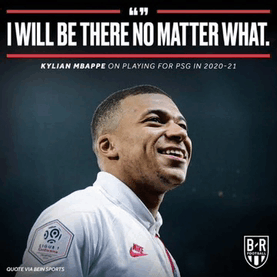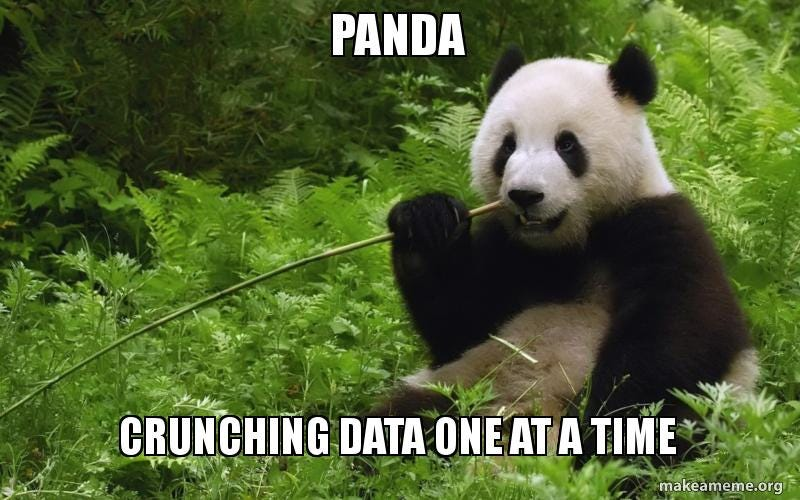)While you don't need to write any of this code, pay attention as the .fillna function is one of the most commonly used methods in pandas.

In [ ]:
# filling NaN values in the table

s23 = s23.fillna(0)

# Dropping unnecessary columns and rows

s23 = s23.drop(["Unnamed: 7", "Notes"], axis = 1)
s23 = s23.drop([110, 111, 114], axis=0)


In [ ]:
s23

,Date,Akatsuki,Bootynuggets,Pandas,Step Bros,Subways,Top Dawgs
0,1/20/2023,0.0,0.0,23.0,0.0,0.0,19.0
1,1/21/2023,20.0,18.0,18.0,0.0,20.0,0.0
2,1/22/2023,23.0,0.0,21.0,0.0,0.0,18.0
3,1/23/2023,0.0,0.0,0.0,0.0,0.0,0.0
4,1/24/2023,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
107,5/7/2023,0.0,0.0,0.0,0.0,0.0,0.0
108,5/8/2023,0.0,0.0,0.0,0.0,0.0,0.0
109,5/9/2023,0.0,0.0,0.0,0.0,0.0,0.0
112,House olympics,55.0,30.0,0.0,5.0,20.0,15.0


In [ ]:
# Lets say we want to find the date/event where Step Bros got the most points
# Using the skeleton code below set the value to max_row to the row corresponding to the correct answer

max_val = # set this variable to the larget value in the Step Bros column

max_row = # hint: think about how we selected rows based on conditions in previous examples



In [ ]:
# We want to visualize how the housepoints for pandas (hehe get it) were distributed throughout the semester
# We first need to make a table with just the Date and Pandas columns

pandas = s23.drop(columns=["Akatsuki", "Step Bros", "Bootynuggets", "Subways", "Top Dawgs"])

 #set this value to a table containing just the Date and Pandas columns

pandas

,Date,Pandas
0,1/20/2023,23.0
1,1/21/2023,18.0
2,1/22/2023,21.0
3,1/23/2023,0.0
4,1/24/2023,0.0
...,...,...
107,5/7/2023,0.0
108,5/8/2023,0.0
109,5/9/2023,0.0
112,House olympics,0.0


In [ ]:
# Plotting all of the dates will be hard to fit, so lets select the last 40 rows of the table (index 73 and up)

pandas = # How can we select many rows based on index?

In [ ]:
# Now we need to set the index of our pandas table to be the Date column

pandas = # Recall how we can change the index of a table. What conditions must be satisfied?

<Axes: xlabel='Date'>

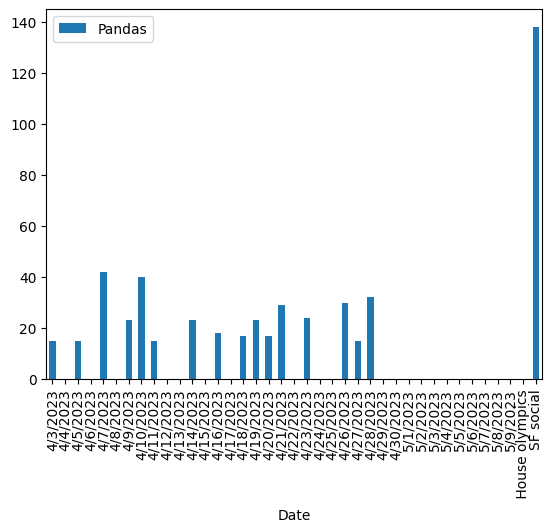

In [ ]:
# Now we can plot!

pandas.plot.bar(y="Pandas")

# Great job!

# Your learning with Pandas isn't over, but as you face new challenges on your projects, these fundamentals will be a great building block!